# 1.Importing necessary Library
# Data Loading

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score

In [4]:
df=pd.read_csv("E:/F/TARIQ/New folder/diabetes.csv")

In [5]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 2. Data Visualization

<AxesSubplot:xlabel='Outcome', ylabel='count'>

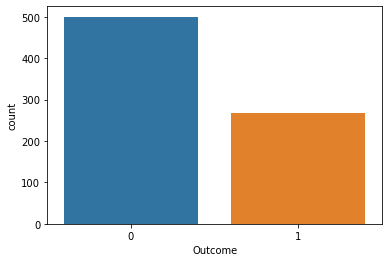

In [8]:
sns.countplot(x='Outcome',data=df)

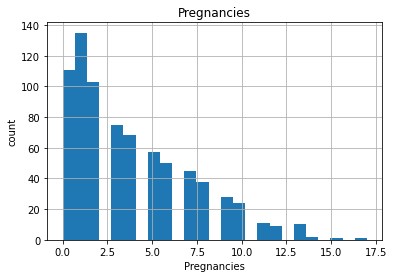

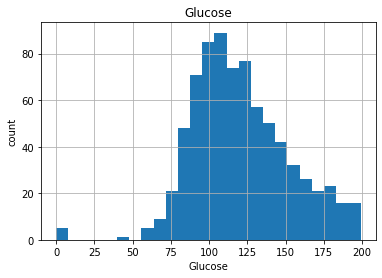

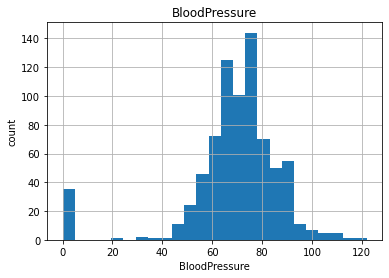

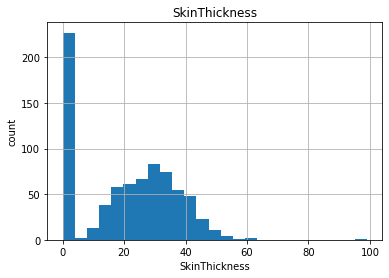

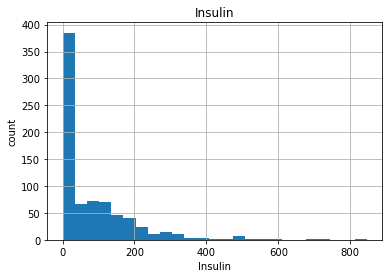

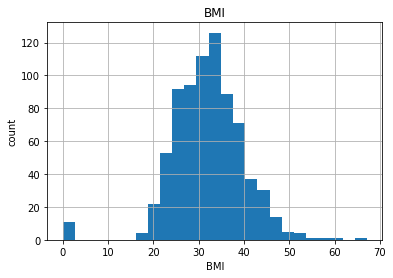

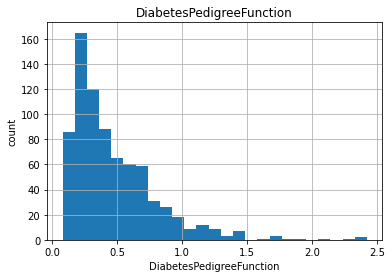

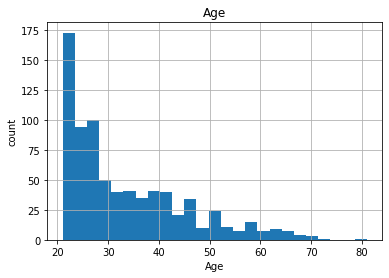

In [9]:
#Histogram of each feature
for feature in df.columns[:8]:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='Age', ylabel='Density'>

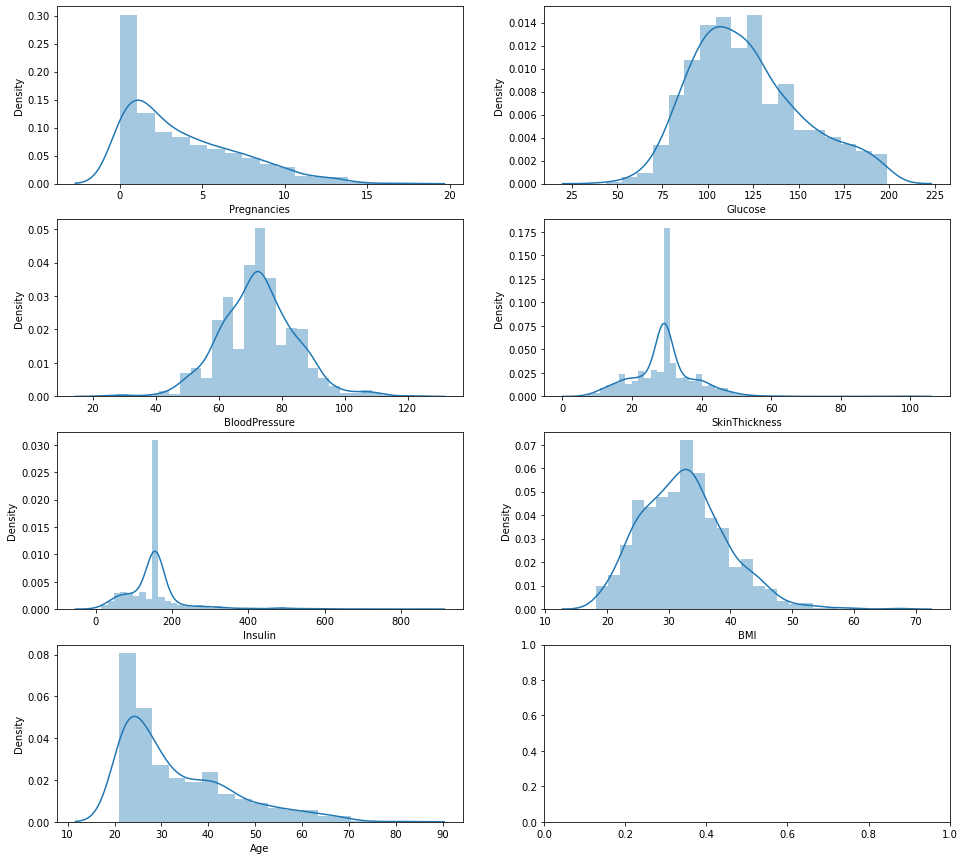

In [38]:
#Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome
fig, ax2 = plt.subplots(4, 2, figsize=(16, 15))
sns.distplot(df['Pregnancies'],ax=ax2[0][0])
sns.distplot(df['Glucose'],ax=ax2[0][1])
sns.distplot(df['BloodPressure'],ax=ax2[1][0])
sns.distplot(df['SkinThickness'],ax=ax2[1][1])
sns.distplot(df['Insulin'],ax=ax2[2][0])
sns.distplot(df['BMI'],ax=ax2[2][1])
sns.distplot(df['Age'],ax=ax2[3][0])

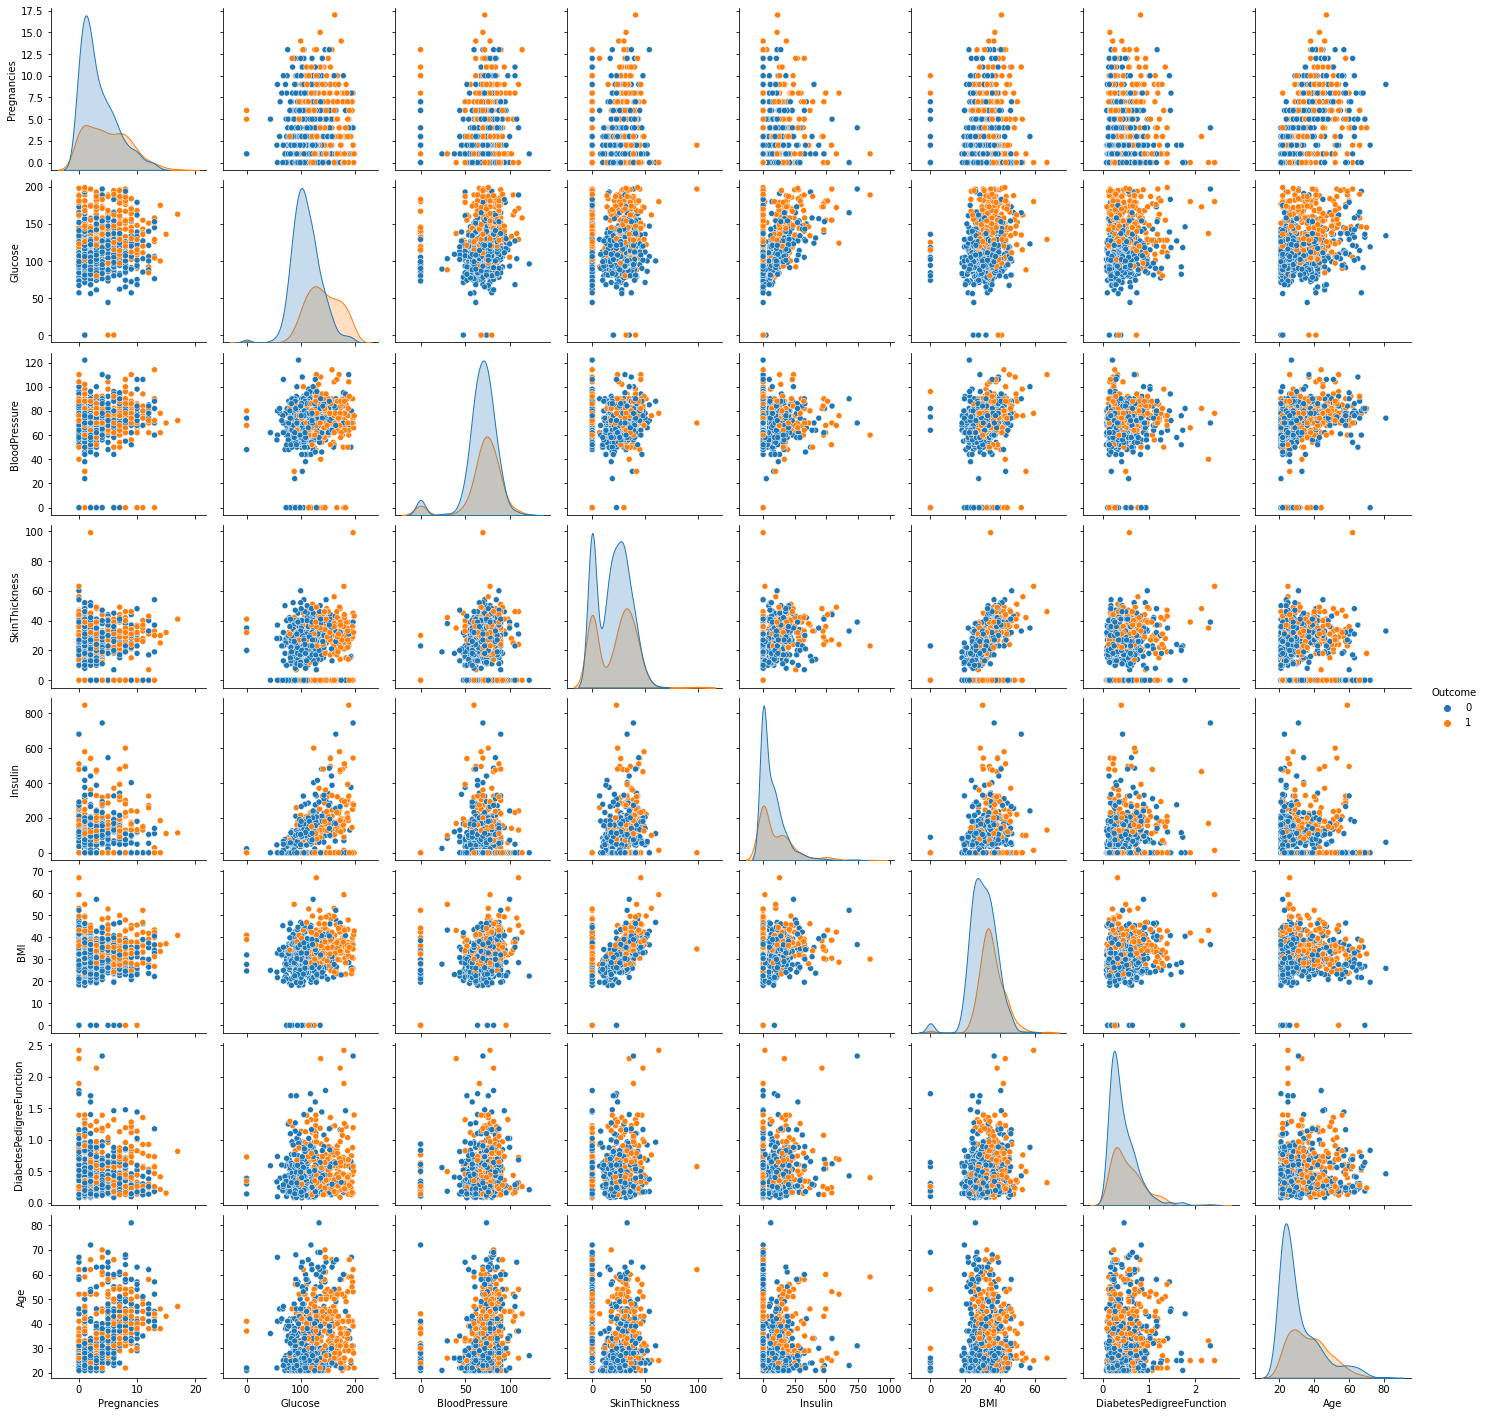

In [10]:
#pairplot
sns.pairplot(data=df,hue='Outcome')
plt.show()

# 3. Data Prepeocessing

In [11]:
# Replacing zero values with NaN
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
# Replacing NaN value by mean, median depending upon distribution
df["Glucose"].fillna(df["Glucose"].mean(),inplace=True)
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace = True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace = True)
df["Insulin"].fillna(df["Insulin"].mean(), inplace = True)
df["BMI"].fillna(df["BMI"].mean(), inplace = True)

In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
# feature scaling 
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
df_scaled=sc.fit_transform(df)
df_scaled=pd.DataFrame(df)
df_scaled.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

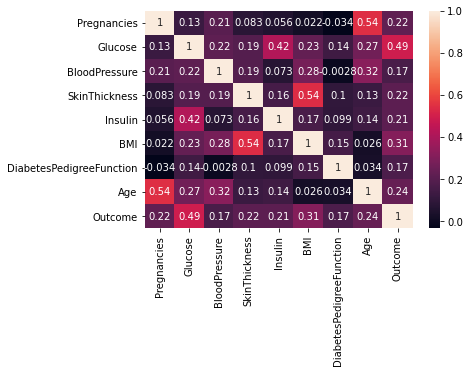

In [15]:
#heat map exploratory data analysis
sns.heatmap(df.corr(),annot=True)
plt.show()

In [16]:
#correlation feature
def correlation(df, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df_scaled.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [17]:
corr_features = correlation(df_scaled, 0.4)
len(set(corr_features))

4

In [18]:
corr_features

{'Age', 'BMI', 'Insulin', 'Outcome'}

In [19]:
#selecting feature
x=df.iloc[:,[1,4,5,7]].values
y=df.iloc[:,8].values

#splitting
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.30,random_state=0, stratify=df['Outcome'])

x,y
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (537, 4)
X_test shape: (231, 4)
Y_train shape: (537,)
Y_test shape: (231,)


In the feature correlation heatmap, we can observe that Glucose, Insulin, Age and BMI are highly correlated with the outcome. So, we select these features as X and the outcome as Y. The dataset is then split using train_test_split with an 80:20 ratio.


# 4: Data Modelling

# 1.Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [28]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=None)
scoring = 'accuracy'

acc_NB = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = kfold,scoring=scoring)
acc_NB.mean()

0.7690426275331935

In [53]:
y_predict_logi = classifier.predict(X_test)
acc= accuracy_score(Y_test, y_predict_logi)
roc=roc_auc_score(Y_test, y_predict_logi)
prec = precision_score(Y_test, y_predict_logi)
rec = recall_score(Y_test, y_predict_logi)
f1 = f1_score(Y_test, y_predict_logi)

model_results1 = pd.DataFrame([['Naive Bayes',acc, acc_NB.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results1

Model  Accuracy  Cross Val Accuracy  Precision    Recall  F1 Score  \
0  Naive Bayes  0.744589            0.685325   0.661765  0.555556  0.604027   

        ROC  
0  0.701111

# 2. Support Vector Classifier Algorithm

"Support Vector Classifier(SVC) is a type of supervised classification model whose objective is to classify the data based on a maximal margin hyperplane build using support vectors. This hyperplane is a decision boundary that classifies between various classes. It is build using support vectors, which are the outliers. The hyperplane which has the highest margin is selected as the decision boundary."

In [65]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)
# Making predictions on test dataset
Y_pred = svc.predict(X_test)
Y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [66]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=None)
scoring = 'accuracy'

acc_svc = cross_val_score(estimator = svc, X = X_train, y = Y_train, cv = kfold,scoring=scoring)
acc_svc.mean()

0.7651991614255766

In [68]:
y_predict_logi = svc.predict(X_test)
acc= accuracy_score(Y_test, y_predict_logi)
roc=roc_auc_score(Y_test, y_predict_logi)
prec = precision_score(Y_test, y_predict_logi)
rec = recall_score(Y_test, y_predict_logi)
f1 = f1_score(Y_test, y_predict_logi)

model_results2 = pd.DataFrame([['Support Vector Classifier(',acc, acc_svc.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results2.append(model_results1,ignore_index = True)

Model  Accuracy  Cross Val Accuracy  Precision  \
0  Support Vector Classifier(  0.774892            0.765199   0.710145   
1                 Naive Bayes  0.744589            0.685325   0.661765   

     Recall  F1 Score       ROC  
0  0.604938  0.653333  0.735802  
1  0.555556  0.604027  0.701111

# 3. Logistic Regression

In [70]:
Logistic= LogisticRegression(random_state=0, penalty='l2')
Logistic.fit(X_train,Y_train)

LogisticRegression(random_state=0)

# What Is Cross Validation?
Cross-validation is the best preventive measure against overfitting. It is a smart technique that allows us to utilize our data in a better way. 

In the data mining models or machine learning models, separation of data into training and testing sets is an essential part. Minimizing the data discrepancies and better understanding of the machine learning model’s properties can be done using similar data for the training and testing subsets.

How about using the same data, if we create multiple training datasets ? 
Where come cross validation.

In [71]:
from sklearn import model_selection

kfold=model_selection.KFold(n_splits=10, random_state=None)

accuracy_Logistic=cross_val_score(estimator=Logistic,X=X_train,y=Y_train,cv=kfold,scoring='accuracy')
accuracy_Logistic

array([0.7962963 , 0.77777778, 0.83333333, 0.7962963 , 0.72222222,
       0.74074074, 0.7962963 , 0.73584906, 0.79245283, 0.66037736])

# Hyper parameter Tuning

In [72]:
accuracy_Logistic

array([0.7962963 , 0.77777778, 0.83333333, 0.7962963 , 0.72222222,
       0.74074074, 0.7962963 , 0.73584906, 0.79245283, 0.66037736])

In [73]:
accuracy_Logistic

array([0.7962963 , 0.77777778, 0.83333333, 0.7962963 , 0.72222222,
       0.74074074, 0.7962963 , 0.73584906, 0.79245283, 0.66037736])

In [74]:
y_predict_logi = Logistic.predict(X_test)
acc= accuracy_score(Y_test, y_predict_logi)
roc=roc_auc_score(Y_test, y_predict_logi)
prec = precision_score(Y_test, y_predict_logi)
rec = recall_score(Y_test, y_predict_logi)
f1 = f1_score(Y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression',acc, accuracy_Logistic,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results.append(model_results2,ignore_index = True)

Model  Accuracy  \
0         Logistic Regression  0.779221   
1  Support Vector Classifier(  0.774892   

                                  Cross Val Accuracy  Precision    Recall  \
0  [0.7962962962962963, 0.7777777777777778, 0.833...   0.714286  0.617284   
1                                           0.765199   0.710145  0.604938   

   F1 Score       ROC  
0  0.662252  0.741975  
1  0.653333  0.735802

# 4. Random Forest 

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [83]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'

acc_rf = cross_val_score(estimator = rf, X = X_train, y = Y_train, cv = kfold,scoring=scoring)
acc_rf.mean()

C:\Users\asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.7448986722571628

# 5. Model Evaluation

In [85]:
y_predict_r = rf.predict(X_test)
roc=roc_auc_score(Y_test, y_predict_r)
acc = accuracy_score(Y_test, y_predict_r)
prec = precision_score(Y_test, y_predict_r)
rec = recall_score(Y_test, y_predict_r)
f1 = f1_score(Y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest (Untuned)',acc,acc_rf.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results


Model  Accuracy  \
0      Logistic Regression  0.779221   
1  Random Forest (Untuned)  0.744589   
2  Random Forest (Untuned)  0.757576   

                                  Cross Val Accuracy  Precision    Recall  \
0  [0.7962962962962963, 0.7777777777777778, 0.833...   0.714286  0.617284   
1                                           0.737282   0.644737  0.604938   
2                                           0.744899   0.676056  0.592593   

   F1 Score       ROC  
0  0.662252  0.741975  
1  0.624204  0.712469  
2  0.631579  0.719630

 F1 score - It is used to measure a test’s accuracy. F1 Score is the Harmonic Mean between precision and recall. The range for F1 Score is [0, 1]. It tells you how precise your classifier is as well as how robust it is. Mathematically, it is given as-
#F1 Score tries to find the balance between precision and recall

 Precision:  It is the number of correct positive results divided by the number of positive results predicted by the classifier. It is expressed as-

Recall:  It is the number of correct positive results divided by the number of all relevant samples. In mathematical form it is given as- 

<AxesSubplot:>

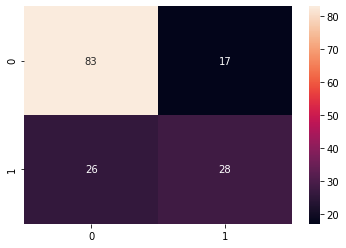

In [42]:
sns.heatmap(pd.DataFrame(cm), annot=True)

# intuitively, overfitting occurs when the machine learning algorithm or the model fits the data too well. Whenever overfitting occurs, the model gives a good performance and accuracy on the training data set but a low accuracy on new unseen data sets.

Contrary to that, whenever a statistical model or a machine learning algorithm cannot capture the data’s underlying trends, under-fitting comes into play.

Intuitively, under-fitting occurs when the the model does not fit the information well enough.

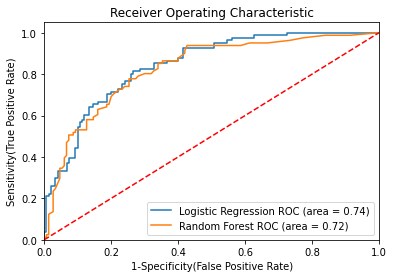

In [155]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(random_state = 0, penalty = 'l2'),
},

    {
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators = 100,criterion='gini', random_state = 47),
},
    
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, Y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [157]:
model_acc= accuracy_score(Y_test, y_predict_logi)
model_acc

0.7792207792207793

In [161]:
import pickle
filename = 'diabetes-prediction-logistic-model.pkl'
pickle.dump(Logistic, open(filename, 'wb'))

Comparing with ensemble of all three algorithm logistic regression regression performed well with the help of K_Fold Cross Validation Technique